
### 1.) For 2018, what was the percentage of the World’s electricity generation by the following sources - Coal, Oil, Natural Gas, Biofuels, Hydro, Nuclear, solar, and wind?


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


# change 'verbose' to True to see print statements
verbose = False

### Combine Data Files

#### The UNdata Explorer interface was used to gather the data for this analysis. Due to the how the interface is designed, seperate queries were made to collect all of the relevant data. For ease of use I will combine all of the datasets into a single dataframe.

In [2]:
# read data into a dataframe
df = pd.read_csv('thermal.csv')
filenames = ['hydro.csv', 'nuclear.csv', 'solar.csv', 'wind.csv']
for sector in filenames:
    temp = pd.read_csv(sector)
    df = df.append(temp)

### Organize Data into Energy Sources

#### Disclaimer: I am making the assumptions that it is reasonable to aggregate groups of commodities together to form the groups:

#### Coal: Hard Coal, Solid Coal Products, Brown Coal
#### Oil: Gas Oil / Diesel Oil, Fuel Oil, Other Oil Products, Oil Shale
#### Natural Gas: Natural Gas
#### Biofuels: Solid Biofuels, Liquid Biofueld, Biogases

##### note: if this were a task at work, I would consult with a subject matter expert or spend time researching the topic more in depth before making the decisions on aggregation

In [3]:
# fetch list of commodities
coms = df['Commodity - Transaction'].unique()

# print out commodities and their positions in list
if verbose:
    for idx, com in enumerate(coms):
        print('{} : {}'.format(idx, com))
        
# aggregate commodities into energy sources
coal_group = [coms[1], coms[13], coms[14]]
oil_group = [coms[2], coms[3], coms[8], coms[17]]
ng_group = [coms[4]]
biofuel_group = [coms[9], coms[10], coms[12]]
other_thermal = [coms[0]]
hydro_group = [coms[20]]
nuclear_group = [coms[21]]
solar_group = [coms[22]]
wind_group = [coms[23]]

# store groups in a dict
sectors = {'coal': coal_group, 
           'oil': oil_group, 
           'natural_gas': ng_group, 
           'biofuels': biofuel_group, 
           'other_thermal': other_thermal,
           'hydro': hydro_group,
           'nuclear': nuclear_group,
           'solar': solar_group,
           'wind': wind_group
          }

# display groups
if verbose:
    for sector in sectors:
        print('===================================================')
        print('                    {}                    '.format(sector))
        for agg in sectors[sector]:
            print(agg)


### Transform Data

In [4]:
# verify that the data meets some criteria before using it in analysis
def validate_data_task1(df):
    
    # check that the year is correct
    if not (df['Year'].to_numpy() == 2018).all():
        return 'error: not all data from 2018'
    
    # check that the units are the same
    if len(df['Unit'].unique()) > 1:
        return 'error: cannot add dissimilar units'
    
    # check that each quantity is not negative
    if df['Quantity'].min() < 0:
        return 'error: negative quantity in data'
    
    return 'data good'

In [5]:
# find energy generated by each source
generation_df = pd.DataFrame()
for sector in sectors:
    
    # extract data for energy group
    sector_data = df[df['Commodity - Transaction'].isin(sectors[sector])]
    
    # validate data meets criteria
    data_check = validate_data_task1(sector_data)
    if data_check != 'data good':
        raise Exception('data validation for {} failed'.format(sector))
    
    # transform data
    generated = sum(sector_data['Quantity'])
    
    # load transformed data into dataframe
    generation_df.insert(0, sector, [generated])


# subtract coal, oil, natural gas, and biofuels from total thermal to find other_thermal
generation_df['other_thermal'] = generation_df['other_thermal'] - (generation_df['coal'] +
                                                                   generation_df['oil'] +
                                                                   generation_df['natural_gas'] +
                                                                   generation_df['biofuels']
                                                                  )

In [6]:
# display resulting dataframe
generation_df

,wind,solar,nuclear,hydro,other_thermal,biofuels,natural_gas,oil,coal
0,1.272283e+06,565067.347833,2708655.22,4.305553e+06,398303.048516,459376.557346,6.164953e+06,682184.356614,9.944870e+06


### Analysis and Visualization

In [7]:
# extract data from dataframe
sectors = list(generation_df.columns)
kwh_generated = np.array(generation_df.iloc[0])

# sort ascending by kWh, save order
sorted_indices = np.argsort(kwh_generated)
kwh_generated.sort()
sectors = [sectors[i] for i in sorted_indices]

# to answer percentage of energy generation
percent_generation = 100 * kwh_generated / sum(kwh_generated)

Text(0.5, 1.0, '2018 Energy Generation by Source')

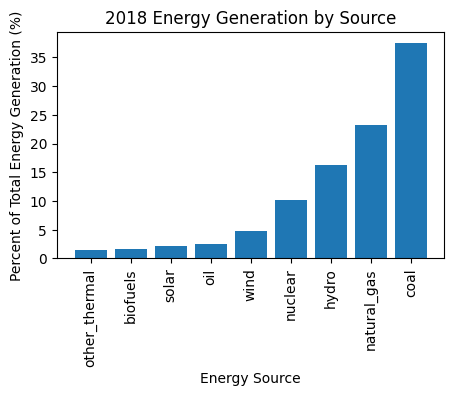

In [8]:
# make plot for percentage usage
plt.rcParams['figure.figsize'] = [5, 3]
plt.rcParams['figure.dpi'] = 100
plt.bar(np.arange(len(percent_generation)), percent_generation)
plt.xticks(ticks = range(0, len(percent_generation)), labels=sectors, rotation='vertical')
plt.xlabel('Energy Source')
plt.ylabel('Percent of Total Energy Generation (%)')
plt.title('2018 Energy Generation by Source')

Text(0.5, 1.0, '2018 Percent Energy Generation by Source')

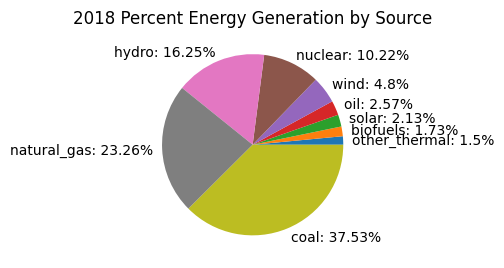

In [9]:
# pie charts are useful for visualizations
name_percents = [name + ': ' + str(round(percent_generation[idx], 2)) + '%' for idx, name in enumerate(sectors)]
plt.pie(percent_generation, labels = name_percents)
plt.title('2018 Percent Energy Generation by Source')

### Discussion

The data used in this analysis shows that over 60% of the power generated in 2018 is from non-renewable fuel sources. Dynamic pricing of electric power is going to increasingly effect consumers as the share of renewable energy increases over the decades to come.